In this notebook:

4A [ ] Heatmaps by category and rankings

4B [ ] windowed examples

In [1]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import os
from arnie.mfe import mfe
from arnie.pfunc import pfunc
from arnie.bpps import bpps
#from ipynb.draw import draw_struct
from RiboGraphViz import RGV

import eternabench as eb

Populating the interactive namespace from numpy and matplotlib


In [4]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EternaBench_external_zscores_by_dataset.csv')
ranking = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EternaBench_external_ranking.csv')

package_order=['rnastructure','vienna_2','rnastructure_60C','vienna_2_60C', 'rnasoft_blstar', 'contrafold_2','eternafold_B']

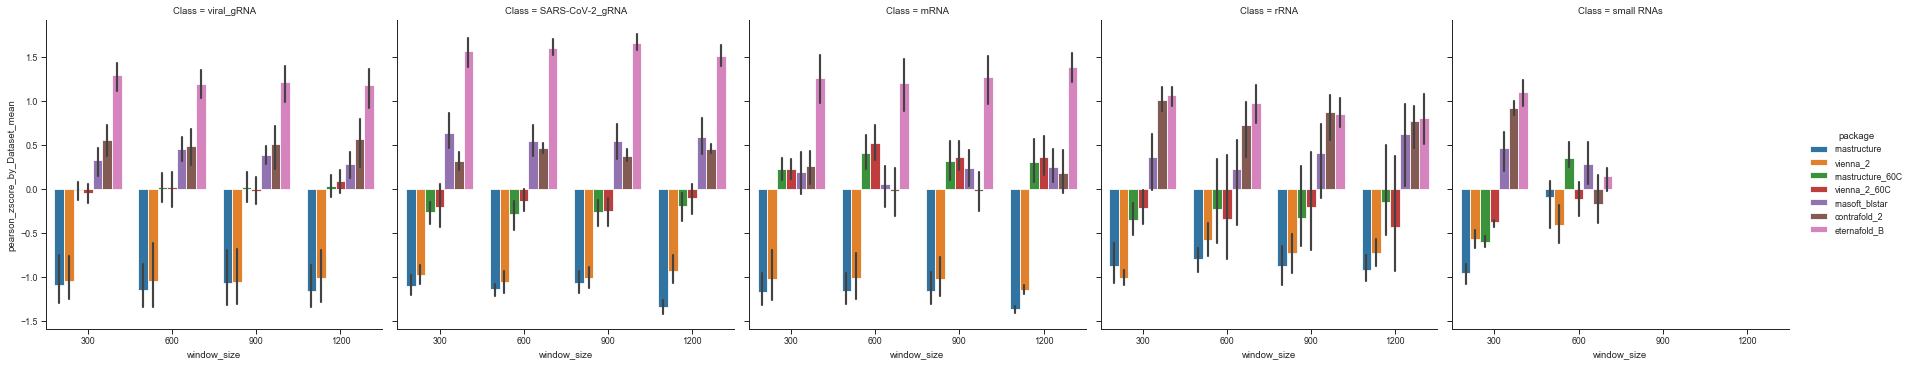

In [19]:

sns.catplot(x='window_size',y='pearson_zscore_by_Dataset_mean', data=zscores,hue='package',col='Class',kind='bar',hue_order=hue_order)

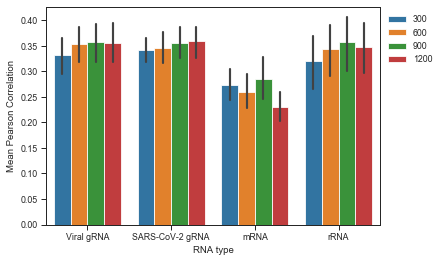

In [11]:
sns.barplot(x='Class',y='pearson_mean', data=zscores.loc[zscores.Class!='small RNAs'],hue='window_size')
legend(frameon=False, bbox_to_anchor=(1,1))
ylabel('Mean Pearson Correlation')
xlabel('RNA type')
xticks(range(4), ['Viral gRNA','SARS-CoV-2 gRNA','mRNA','rRNA'])
savefig('FIGURES/SI/windowed_mean_correlations.pdf',bbox_inches='tight')

In [14]:
zscores.loc[zscores.Class!='small RNAs'].groupby(['Class','window_size'])['pearson_mean'].agg(['mean','std'])

mean       std
Class           window_size                    
SARS-CoV-2_gRNA 300          0.342128  0.086880
                600          0.346872  0.098740
                900          0.356657  0.098625
                1200         0.358852  0.100491
mRNA            300          0.273889  0.128210
                600          0.259231  0.137194
                900          0.284818  0.166194
                1200         0.230467  0.108404
rRNA            300          0.319587  0.141598
                600          0.344034  0.135145
                900          0.356820  0.144085
                1200         0.348211  0.143712
viral_gRNA      300          0.331759  0.157368
                600          0.352996  0.162497
                900          0.357775  0.165569
                1200         0.356444  0.161313

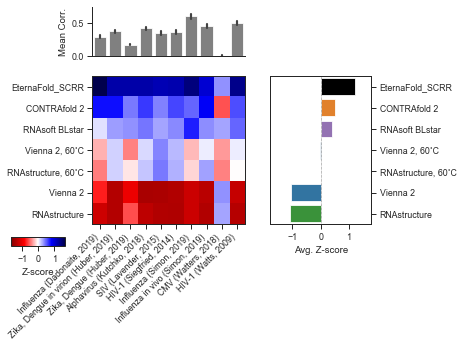

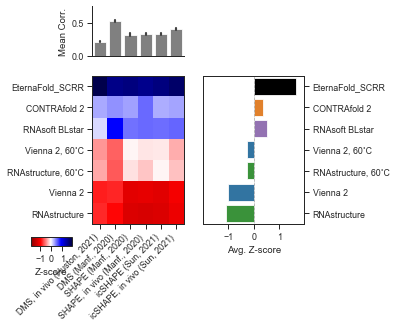

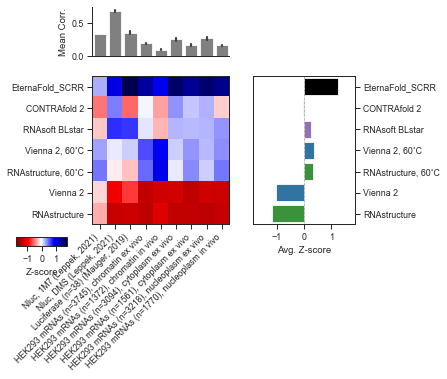

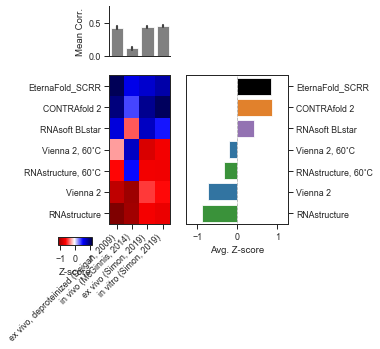

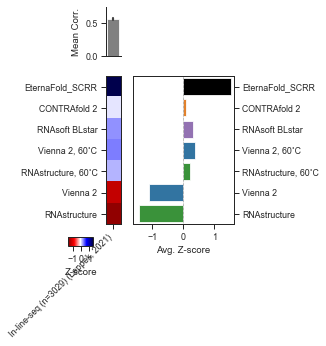

In [7]:
for i, rna in enumerate(zscores['Class'].unique()):
    tmp_zscores = zscores.loc[zscores.window_size==900][zscores.Class==rna]
    tmp_ranking = ranking.loc[ranking.window_size==900][ranking.Class==rna]
    n=len(tmp_zscores.Dataset.unique())

    eb.plot.ranked_heatmap_w_bar_overhead(tmp_zscores, tmp_ranking, package_order=package_order, vmin=-1.7,vmax=1.7,figsize=(.3*n+2,4), width_ratios=[.3*n, 2], ext=True)
    savefig('FIGURES/4/%s_heatmap.pdf' % rna,bbox_inches='tight')

In [68]:
df.loc[df.name.str.contains('ENST00000534336')].name.iloc[0]

'Sun, 2019 HEK293 chromatin in vitro ENST00000534336'

<Figure size 432x288 with 0 Axes>

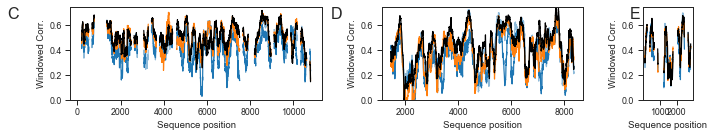

In [77]:
ex_data=['Huber (2019), ZILM','Sun, 2019 HEK293 chromatin in vitro ENST00000534336',
         'Deigan, 2009 ex vivo deproteinized e. Coli 23S rRNA' ]

blue, orange, green, red, purple, brown, _, _, _, _=sns.color_palette()
palette = [brown, blue, red, green,orange, purple, [0,0,0]]

packages = ['vienna_2', 'vienna_2_60C','contrafold_2', 'eternafold_B']

colors=[blue, blue, orange,'k']
alpha=[1,0.5,1,1]
figure(figsize=(6,4))

gridkw = dict(width_ratios=[10,8,2])
fig, ax = plt.subplots(1,3, gridspec_kw=gridkw, figsize=(10,2))

letters=list('CDE')

for ex_ind, ex in enumerate(ex_data):
    for p, pkg in enumerate(packages):
        df = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/Ext900/CM_%s.json.zip' % pkg)
        tmp = df.loc[df.name==ex]
        n=tmp['orig_seqpos'].iloc[-1][-1]+1
        cat_r = {k:[] for k in range(n)}
        cat_p = {k:[] for k in range(n)}
        for _, row in tmp.iterrows():
            for i, orig in enumerate(row['orig_seqpos']):
                cat_p[orig].append(row['p_%s' % pkg][i])
                cat_r[orig].append(row['reactivity'][i])

        cat_R = [cat_r[i][0] for i in range(n)]
        cat_P = [np.nanmedian(cat_p[i]) for i in range(n)]

        dat = pd.DataFrame({'R': cat_R, 'P': cat_P})
        ax[ex_ind].plot(dat['R'].rolling(150).corr(dat['P']),c=colors[p],alpha=alpha[p])
    ax[ex_ind].set_ylabel('Windowed Corr.')
    ax[ex_ind].set_ylim([0,0.75])
    ax[ex_ind].annotate(letters[ex_ind], xy=(-.25, 1.), xycoords='axes fraction', horizontalalignment='left', verticalalignment='top', fontsize=16)

    ax[ex_ind].set_xlabel('Sequence position')
    
tight_layout()
savefig('FIGURES/4/4CDE.pdf',bbox_inches='tight')